In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df_2015 = pd.read_csv("2015.csv")
df_2016 = pd.read_csv("2016.csv")
df_2017 = pd.read_csv("2017.csv")
df_2018 = pd.read_csv("2018.csv").interpolate()

In [ ]:
print('2015 mean happiness score is {}'.format(df_2015['Happiness Score'].mean()))
print('2016 mean happiness score is {}'.format(df_2016['Happiness Score'].mean()))
print('2017 mean happiness score is {}'.format(df_2017['Happiness.Score'].mean()))
print('2018 mean happiness score is {}'.format(df_2018['Score'].mean()))

print('2015 median happiness score is {}'.format(df_2015['Happiness Score'].median()))
print('2016 median happiness score is {}'.format(df_2016['Happiness Score'].median()))
print('2017 median happiness score is {}'.format(df_2017['Happiness.Score'].median()))
print('2018 median happiness score is {}'.format(df_2018['Score'].median()))


2015 mean happiness score is 5.3757341772151905
2016 mean happiness score is 5.382184713375795
2017 mean happiness score is 5.354019355773926
2018 mean happiness score is 5.375916666666668
2015 median happiness score is 5.2325
2016 median happiness score is 5.314
2017 median happiness score is 5.27899980545044
2018 median happiness score is 5.378


In [ ]:
rank = df_2015[['Country', 'Happiness Rank']].merge(df_2016[['Country', 'Happiness Rank']]
                                                      , left_on='Country', right_on='Country')
rank = rank.merge(df_2017[['Country', 'Happiness.Rank']], left_on='Country', right_on='Country')
rank = rank.merge(df_2018[['Country or region', 'Overall rank']], left_on='Country', right_on='Country or region')
rank['change'] = (np.abs(rank['Happiness Rank_y'] - rank['Happiness Rank_x']) 
                                   + np.abs(rank['Happiness.Rank'] - rank['Happiness Rank_y'])
                                   + np.abs(rank['Overall rank'] - rank['Happiness.Rank']))
rank[['Country', 'change']].sort_values(by='change').head(10)

,Country,change
6,Netherlands,1
8,New Zealand,1
1,Iceland,2
4,Canada,2
9,Australia,2
18,Belgium,3
7,Sweden,3
139,Rwanda,3
12,Austria,3
45,Italy,3


In [ ]:
rank['increased rank'] = rank['Overall rank'] - rank['Happiness Rank_x']
rank = rank[['Country', 'increased rank']].sort_values(by='increased rank', ascending=False)
increased_rank = rank[rank['increased rank']>0]

In [ ]:
increased_rank

,Country,increased rank
21,Venezuela,79
78,Zambia,40
104,Liberia,33
103,Zimbabwe,29
107,Haiti,29
99,Ukraine,27
67,Indonesia,22
57,Croatia,20
68,Vietnam,20
106,Sudan,19


0.8021239467301907

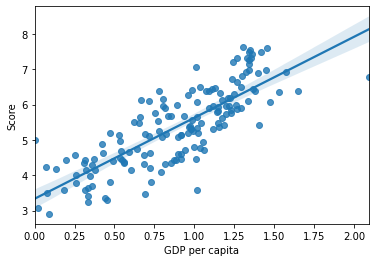

In [ ]:
gdp = sns.regplot(x="GDP per capita", y="Score", data=df_2018)
df_2018['GDP per capita'].corr(df_2018['Score'])

0.7457601649725754

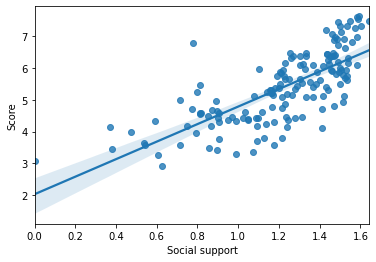

In [ ]:
social_support = sns.regplot(x="Social support", y="Score", data=df_2018)
df_2018['Social support'].corr(df_2018['Score'])

0.7758136033302464

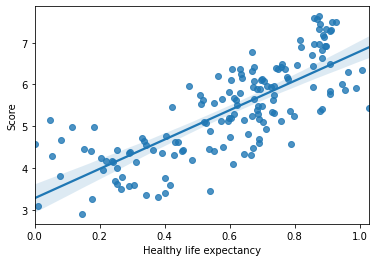

In [ ]:
Healthy= sns.regplot(x="Healthy life expectancy", y="Score", data=df_2018)
df_2018['Healthy life expectancy'].corr(df_2018['Score'])

0.5442799358332934

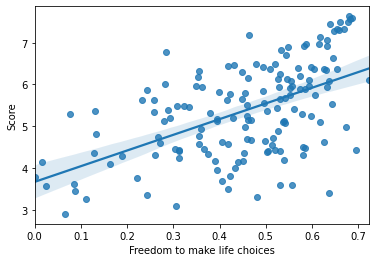

In [ ]:
freedom = sns.regplot(x="Freedom to make life choices", y="Score", data=df_2018)
df_2018['Freedom to make life choices'].corr(df_2018['Score'])

0.1358247470811378

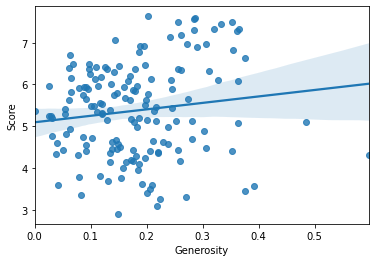

In [ ]:
Generosity= sns.regplot(x="Generosity", y="Score", data=df_2018)
df_2018['Generosity'].corr(df_2018['Score'])

0.4064320705947888

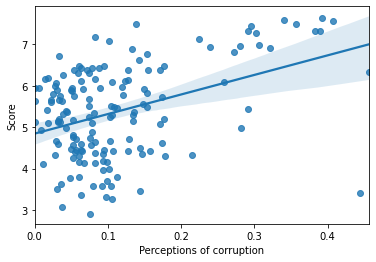

In [ ]:
corruption= sns.regplot(x="Perceptions of corruption", y="Score", data=df_2018)
df_2018['Perceptions of corruption'].corr(df_2018['Score'])

['GDP per capita','Social support','Healthy life expectancy',
,'Freedom to make life choices','Generosity','Perceptions of corruption']are the features contributing to the score of happiness. The feature that has the highest correlation coefficient is GDP (around 0.8), the feature has the least correlation coefficient is 'Generosity' (around 0.14). If I were a president of the country, I will try to improve the ['GDP per capita','Social support','Healthy life expectancy'] of the country mostly since they have the highest correlation coefficient, and focus on the rest if I still have leftover resources. 

In [ ]:
from sklearn import linear_model
train_X = df_2018[['GDP per capita','Social support','Healthy life expectancy',
                   'Freedom to make life choices','Generosity','Perceptions of corruption']]
train_y = df_2018['Score']            
reg = linear_model.LinearRegression()
reg.fit(train_X,train_y)
reg.coef_       

In [ ]:
test_df= pd.read_csv("2019.csv")
test_X = test_df[['GDP per capita','Social support','Healthy life expectancy',
                   'Freedom to make life choices','Generosity','Perceptions of corruption']]
test_y = test_df['Score']          
y_pred= reg.predict(test_X)
df1 = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})
#df1.head(20)
df1.describe()

In [ ]:
#model 2  KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
reg_knn = KNeighborsRegressor(n_neighbors=3)
reg_knn.fit(train_X, train_y)

In [ ]:
y_pred_knn= reg_knn.predict(test_X)
df2 = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred_knn})
#df2.head(20)
df2.describe()

In [ ]:
df1.describe()